In [181]:
import os
import requests
import pandas as pd

In [ ]:
# import os
# import requests
# import pandas as pd

# BASE_DIR = "/Users/daniilshaposhnik/Text_analysis_CW"
# DATA_DIR = os.path.join(BASE_DIR, "data")


# games_df = pd.read_csv("notebooks/games_list_all-time_peak_top100.csv")

# def fetch_news(appid, count=100, maxlength=5000):
#     url = (
#         "http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/"
#         f"?appid={appid}&count={count}&maxlength={maxlength}&format=json"
#     )
#     resp = requests.get(url).json()
    
    
#     # Защита от неожиданных ответов
#     if "appnews" not in resp or "newsitems" not in resp["appnews"]:
#         print(f"appid={appid}: нет ключа 'appnews' или 'newsitems', пропускаем")
#         return []

#     newsitems = resp["appnews"]["newsitems"]
#     return [
#         {
#             "appid": appid,
#             "title": item.get("title", ""),
#             "contents": item.get("contents", ""),
#             "date": item.get("date", None),
#             "tags": item.get("tags", "")
#         }
#         for item in newsitems
#     ]


# for _, row in games_df.iterrows():
#     appid = int(row["appid"])
#     name = str(row["game_name"])

#     news_rows = fetch_news(appid, count=100)
#     if not news_rows:
#         print(f"⏭ {name} (appid={appid}): новостей нет, файл не создаём")
#         continue

    
#     df = pd.DataFrame(news_rows)

#     out_path = os.path.join(DATA_DIR, f"{name}_news.csv")
#     df.to_csv(out_path, index=False)

#     print(f"{name} (appid={appid}): сохранено {len(df)} новостей → {out_path}")


pubg_battlegrounds (appid=578080): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/pubg_battlegrounds_news.csv
black_myth_wukong (appid=2358720): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/black_myth_wukong_news.csv
palworld (appid=1623730): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/palworld_news.csv
counter_strike_2 (appid=730): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/counter_strike_2_news.csv
monster_hunter_wilds (appid=2246340): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/monster_hunter_wilds_news.csv
lost_ark (appid=1599340): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/lost_ark_news.csv
dota_2 (appid=570): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/dota_2_news.csv
cyberpunk_2077 (appid=1091500): сохранено 100 новостей → /Users/daniilshaposhnik/Text_analysis_CW/data/cyberpunk_2077_news.csv
eld

In [197]:
# Объединяем все CSV в один DataFrame

from pathlib import Path

DATA_DIR = Path("../data")

dfs = []

for csv_file in DATA_DIR.glob("*.csv"):
    df = pd.read_csv(csv_file)
    
    # имя игры берём из имени файла
    game_name = csv_file.stem
    
    df["game_name"] = game_name
    
    dfs.append(df)

news_df = pd.concat(dfs, ignore_index=True)
print(news_df.shape)

(7888, 6)


In [198]:
news_df.head()

,appid,title,contents,date,tags,game_name
0,1091500,Город Легенд: Cyberpunk 2077 исполнилось 5 лет,10 декабря 2020 года <strong>Cyberpunk 2077</s...,1765396560,NaN,cyberpunk_2077_news
1,1091500,5th Anniversary Trailer — City of Legends,Celebrate five years of Cyberpunk 2077 in this...,1765386445,NaN,cyberpunk_2077_news
2,1091500,Steam Global Top Sellers for week of 2 Dec — 9...,"<a href=""https://steamdb.info/topsellers/2025W...",1765270800,NaN,cyberpunk_2077_news
3,1091500,CD Projekt winds up Cyberpunk 2077 fans with f...,"<a href=""https://www.pcgamer.com/cyberpunk-207...",1764715236,NaN,cyberpunk_2077_news
4,1091500,Steam Global Top Sellers for week of 25 Nov — ...,"<a href=""https://steamdb.info/topsellers/2025W...",1764666000,NaN,cyberpunk_2077_news


In [199]:
news_df["date"] = pd.to_datetime(news_df["date"], unit="s")
news_df["year_month"] = news_df["date"].dt.to_period("M")

In [200]:
news_df.head()

,appid,title,contents,date,tags,game_name,year_month
0,1091500,Город Легенд: Cyberpunk 2077 исполнилось 5 лет,10 декабря 2020 года <strong>Cyberpunk 2077</s...,2025-12-10 19:56:00,NaN,cyberpunk_2077_news,2025-12
1,1091500,5th Anniversary Trailer — City of Legends,Celebrate five years of Cyberpunk 2077 in this...,2025-12-10 17:07:25,NaN,cyberpunk_2077_news,2025-12
2,1091500,Steam Global Top Sellers for week of 2 Dec — 9...,"<a href=""https://steamdb.info/topsellers/2025W...",2025-12-09 09:00:00,NaN,cyberpunk_2077_news,2025-12
3,1091500,CD Projekt winds up Cyberpunk 2077 fans with f...,"<a href=""https://www.pcgamer.com/cyberpunk-207...",2025-12-02 22:40:36,NaN,cyberpunk_2077_news,2025-12
4,1091500,Steam Global Top Sellers for week of 25 Nov — ...,"<a href=""https://steamdb.info/topsellers/2025W...",2025-12-02 09:00:00,NaN,cyberpunk_2077_news,2025-12


In [ ]:
# !pip install bs4

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [bs4]


In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def parse_steamcharts(appid):
    url = f"https://steamcharts.com/app/{appid}"
    r = requests.get(url, timeout=10)

    if r.status_code != 200:
        return None

    soup = BeautifulSoup(r.text, "html.parser")
    table = soup.find("table", class_="common-table")

    rows = table.find_all("tr")[1:]

    data = []
    for row in rows:
        cols = [c.text.strip() for c in row.find_all("td")]
        if len(cols) < 2:
            continue

        month_str = cols[0]

        # пропускаем значение "Last 30 Days"
        if month_str.lower().startswith("last"):
            continue

        avg_players = cols[1].replace(",", "")

        try:
            avg_players = float(avg_players)
        except ValueError:
            continue

        data.append({
            "appid": appid,
            "month": month_str,
            "avg_players": avg_players
        })

    return pd.DataFrame(data)

In [14]:
def normalize_month(df):
    df["year_month"] = pd.to_datetime(
        df["month"],
        format="%B %Y"
    ).dt.to_period("M")

    return df.drop(columns=["month"])

In [201]:
appids = news_df["appid"].unique()
print(len(appids))

91


In [207]:
steamcharts_dfs = []

for appid in appids:
    print(f"Парсим appid={appid}")
    df_sc = parse_steamcharts(appid)
    
    if df_sc is not None:
        df_sc = normalize_month(df_sc)
        steamcharts_dfs.append(df_sc)
    
    time.sleep(1.5) 

Парсим appid=1091500
Парсим appid=1755910
Парсим appid=278360
Парсим appid=1085660
Парсим appid=1808500
Парсим appid=238960
Парсим appid=3419430
Парсим appid=1240440
Парсим appid=1063730
Парсим appid=275850
Парсим appid=440
Парсим appid=1568590
Парсим appid=105600
Парсим appid=271590
Парсим appid=359550
Парсим appid=2507950
Парсим appid=304390
Парсим appid=1716740
Парсим appid=1285190
Парсим appid=1515950
Парсим appid=2881650
Парсим appid=370910
Парсим appid=3489700
Парсим appid=2139460
Парсим appid=3167020
Парсим appid=990080
Парсим appid=377160
Парсим appid=1966720
Парсим appid=3241660
Парсим appid=2694490
Парсим appid=2246340
Парсим appid=10
Парсим appid=1046930
Парсим appid=72850
Парсим appid=1623730
Парсим appid=1449850
Парсим appid=346110
Парсим appid=1100600
Парсим appid=218620
Парсим appid=343710
Парсим appid=1172710
Парсим appid=582010
Парсим appid=1030300
Парсим appid=2183900
Парсим appid=1326470
Парсим appid=2001120
Парсим appid=261550
Парсим appid=578080
Парсим appid=120322

In [210]:
print(df_sc)


      appid  avg_players year_month
0   2358720      9748.92    2025-11
1   2358720     11108.62    2025-10
2   2358720     13734.80    2025-09
3   2358720     21398.44    2025-08
4   2358720     20900.67    2025-07
5   2358720     16640.32    2025-06
6   2358720     13116.67    2025-05
7   2358720     14182.18    2025-04
8   2358720     17440.78    2025-03
9   2358720     24928.37    2025-02
10  2358720     33603.26    2025-01
11  2358720     43764.68    2024-12
12  2358720     39811.55    2024-11
13  2358720     92079.56    2024-10
14  2358720    332832.44    2024-09
15  2358720    970442.70    2024-08


In [215]:
steamcharts_df = pd.concat(steamcharts_dfs, ignore_index=True)
steamcharts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   appid        5737 non-null   int64    
 1   avg_players  5737 non-null   float64  
 2   year_month   5737 non-null   period[M]
dtypes: float64(1), int64(1), period[M](1)
memory usage: 134.6 KB


In [189]:
print(steamcharts_df.shape)

(5737, 3)


In [216]:
print(steamcharts_df.duplicated().sum())

0


In [221]:
steamcharts_df.head()

,appid,avg_players,year_month
0,1091500,26020.70,2025-11
1,1091500,31692.28,2025-10
2,1091500,32970.21,2025-09
3,1091500,47414.08,2025-08
4,1091500,42497.63,2025-07


In [222]:
news_df.head()

,appid,title,contents,date,tags,game_name,year_month
0,1091500,Город Легенд: Cyberpunk 2077 исполнилось 5 лет,10 декабря 2020 года <strong>Cyberpunk 2077</s...,2025-12-10 19:56:00,NaN,cyberpunk_2077_news,2025-12
1,1091500,5th Anniversary Trailer — City of Legends,Celebrate five years of Cyberpunk 2077 in this...,2025-12-10 17:07:25,NaN,cyberpunk_2077_news,2025-12
2,1091500,Steam Global Top Sellers for week of 2 Dec — 9...,"<a href=""https://steamdb.info/topsellers/2025W...",2025-12-09 09:00:00,NaN,cyberpunk_2077_news,2025-12
3,1091500,CD Projekt winds up Cyberpunk 2077 fans with f...,"<a href=""https://www.pcgamer.com/cyberpunk-207...",2025-12-02 22:40:36,NaN,cyberpunk_2077_news,2025-12
4,1091500,Steam Global Top Sellers for week of 25 Nov — ...,"<a href=""https://steamdb.info/topsellers/2025W...",2025-12-02 09:00:00,NaN,cyberpunk_2077_news,2025-12


In [220]:
news_df.shape

(7888, 7)

In [223]:
final_df = news_df.merge(
    steamcharts_df,
    on=["appid", "year_month"],
    how="inner"
)

print(final_df.shape)
final_df.head()

(7426, 8)


,appid,title,contents,date,tags,game_name,year_month,avg_players
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,2025-11,26020.7
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,2025-11,26020.7
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,2025-11,26020.7
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,2025-11,26020.7
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,2025-11,26020.7


In [227]:
empty_rows = final_df[final_df['avg_players'].isna()]
print(empty_rows.count())

appid          0
title          0
contents       0
date           0
tags           0
game_name      0
year_month     0
avg_players    0
dtype: int64


In [ ]:
# !pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]b]


In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniilshaposhnik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_html(text):
    if pd.isna(text):
        return ""
    
    # очистка HTML
    text = BeautifulSoup(text, "html.parser").get_text() # Создаётся объект BeautifulSoup из строки text, извлекает текст без HTML-тегов.

    # убираем ссылки
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # убираем пробелы и переносы строк
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [228]:
final_df["clean_text"] = final_df["contents"].apply(clean_html)

/var/folders/ww/jl70sxb157j8dtjgp9l6xcy00000gn/T/ipykernel_17857/814719248.py:6: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text() # Создаётся объект BeautifulSoup из ст

In [230]:
final_df["clean_text"].head()

0    Cyberpunk 2's dev team is set to grow substant...
1    Fashion is an important metric with which I us...
2    CD Projekt опубликовала отчёт за третий кварта...
3    Remember when Cyberpunk 2077 launched in late ...
4    CD Projekt Red is on a big recruitment push at...
Name: clean_text, dtype: object

In [231]:
final_df["clean_text"] = final_df["clean_text"].str.lower()

In [ ]:
def remove_numbers_symbols(text):
    # оставляем только буквы
    text = re.sub(r'[^a-zа-яё\s]', '', text)
    return text

final_df["clean_text"] = final_df["clean_text"].apply(remove_numbers_symbols)

In [233]:
# объединяем английские и русские стоп-слова
stop_words = set(stopwords.words('english')).union(set(stopwords.words('russian')))

def remove_stopwords(text):
    return ' '.join([w for w in text.split() if w not in stop_words])

final_df["clean_text"] = final_df["clean_text"].apply(remove_stopwords)

In [234]:
save_clean_df = final_df.copy()
save_clean_df.head()


,appid,title,contents,date,tags,game_name,year_month,avg_players,clean_text
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,2025-11,26020.7,cyberpunk dev team set grow substantially next...
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,2025-11,26020.7,fashion important metric use measure quality m...
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,2025-11,26020.7,cd projekt опубликовала отчёт третий квартал г...
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,2025-11,26020.7,remember cyberpunk launched late basically wor...
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,2025-11,26020.7,cd projekt red big recruitment push moment sca...


In [235]:
final_df.groupby("game_name")["clean_text"].count().sort_values(ascending=False)
final_df.groupby("year_month")["clean_text"].count()

year_month
2013-03      1
2013-09      1
2013-12      1
2014-02      4
2014-03      4
          ... 
2025-07    483
2025-08    468
2025-09    569
2025-10    540
2025-11    547
Freq: M, Name: clean_text, Length: 137, dtype: int64

In [ ]:
# !pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11

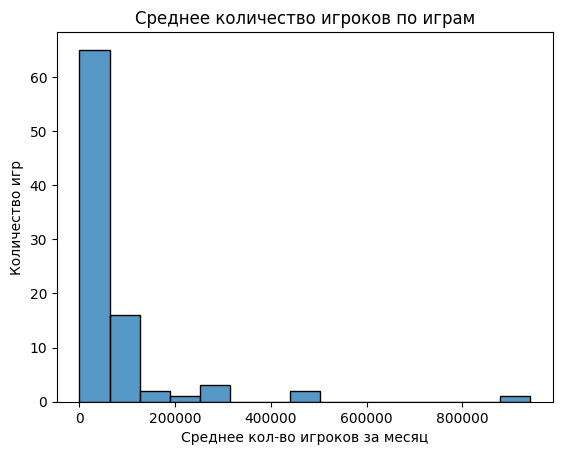

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns


game_avg = final_df.groupby('game_name')['avg_players'].mean().reset_index()

sns.histplot(game_avg['avg_players'], bins=15)
plt.title('Среднее количество игроков по играм')
plt.xlabel('Среднее кол-во игроков за месяц')
plt.ylabel('Количество игр')
plt.show()


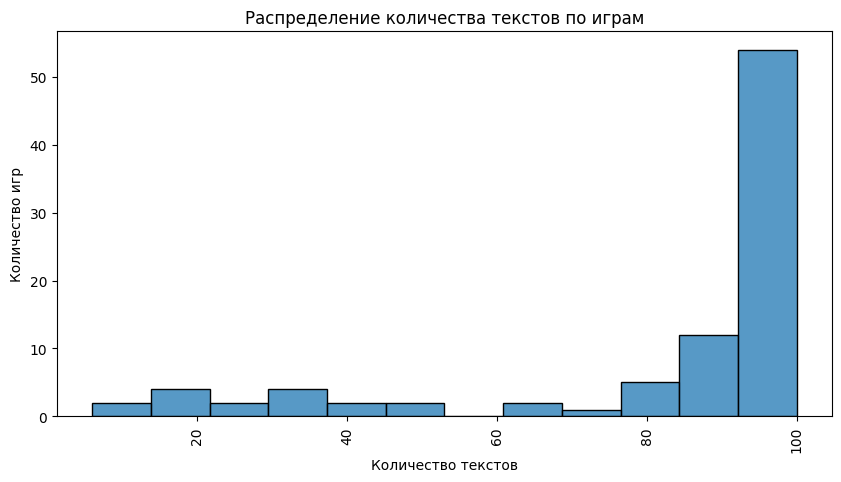

In [237]:
texts_per_game = final_df.groupby(["appid"])["clean_text"].count().reset_index()
texts_per_game.head()

plt.figure(figsize=(10,5))
sns.histplot(texts_per_game["clean_text"], bins=12)
plt.xticks(rotation=90)
plt.xlabel("Количество текстов")
plt.ylabel("Количество игр")
plt.title("Распределение количества текстов по играм")
plt.show()

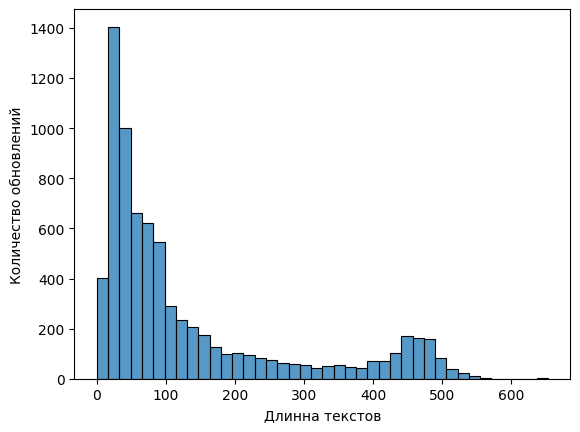

In [238]:
final_df["text_len"] = final_df["clean_text"].str.split().str.len()
sns.histplot(final_df["text_len"], bins=40)
plt.xlabel("Длинна текстов")
plt.ylabel("Количество обновлений")
plt.show()

In [ ]:
# !pip install pymorphy3

  Using cached pymorphy3-2.0.6-py3-none-any.whl.metadata (2.4 kB)
  Using cached dawg2_python-0.9.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pymorphy3-2.0.6-py3-none-any.whl (53 kB)
Using cached dawg2_python-0.9.0-py3-none-any.whl (9.3 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl (8.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pymorphy3]/4 [setuptools]


In [ ]:
from nltk.stem.snowball import SnowballStemmer
import pymorphy3

# Лемматизация и стемминг
morph = pymorphy3.MorphAnalyzer()
stemmer = SnowballStemmer("english")

def lem_stem(text):
    words = text.split()
    list = []
    for word in words:
        # английские слова - стемминг
        if re.match(r'[a-zA-Z]+', word):
            list.append(stemmer.stem(word))
        # русские слова - лемматизация
        elif re.match(r'[а-яёА-ЯЁ]+', word):
            list.append(morph.parse(word)[0].normal_form)
    return ' '.join(list)

final_df["clean_text_lemmatized_stem"] = final_df["clean_text"].apply(lem_stem)
final_df["clean_text_lemmatized_stem"].head()

0    cyberpunk dev team set grow substanti next cou...
1    fashion import metric use measur qualiti moder...
2    cd projekt опубликовать отчёт третий квартал г...
3    rememb cyberpunk launch late basic worst video...
4    cd projekt red big recruit push moment scale d...
Name: clean_text_lemmatized_stem, dtype: object

In [ ]:
final_df["text_len"] = final_df["clean_text_lemmatized_stem"].str.split().str.len()
# длинна текста в словах
final_df["text_len"].head()

0    50
1    26
2    16
3    38
4    41
Name: text_len, dtype: int64

In [241]:
def count_unique_words(text):
    return len(set(text.split()))

final_df["unique_words"] = final_df["clean_text_lemmatized_stem"].apply(count_unique_words)

In [242]:
final_df.head()

,appid,title,contents,date,tags,game_name,year_month,avg_players,clean_text,text_len,clean_text_lemmatized_stem,unique_words
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,2025-11,26020.7,cyberpunk dev team set grow substantially next...,50,cyberpunk dev team set grow substanti next cou...,48
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,2025-11,26020.7,fashion important metric use measure quality m...,26,fashion import metric use measur qualiti moder...,26
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,2025-11,26020.7,cd projekt опубликовала отчёт третий квартал г...,16,cd projekt опубликовать отчёт третий квартал г...,15
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,2025-11,26020.7,remember cyberpunk launched late basically wor...,38,rememb cyberpunk launch late basic worst video...,37
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,2025-11,26020.7,cd projekt red big recruitment push moment sca...,41,cd projekt red big recruit push moment scale d...,37


In [243]:
final_df["date"] = pd.to_datetime(final_df["date"])

final_df["day_of_week"] = final_df["date"].dt.dayofweek.astype(str)

In [244]:
final_df.head()

,appid,title,contents,date,tags,game_name,year_month,avg_players,clean_text,text_len,clean_text_lemmatized_stem,unique_words,day_of_week
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,2025-11,26020.7,cyberpunk dev team set grow substantially next...,50,cyberpunk dev team set grow substanti next cou...,48,3
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,2025-11,26020.7,fashion important metric use measure quality m...,26,fashion import metric use measur qualiti moder...,26,3
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,2025-11,26020.7,cd projekt опубликовала отчёт третий квартал г...,16,cd projekt опубликовать отчёт третий квартал г...,15,3
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,2025-11,26020.7,remember cyberpunk launched late basically wor...,38,rememb cyberpunk launch late basic worst video...,37,2
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,2025-11,26020.7,cd projekt red big recruitment push moment sca...,41,cd projekt red big recruit push moment scale d...,37,2


In [245]:
base_df = final_df.copy()

In [ ]:
# категориальные признаки для Random Forest
cat_cols = ["year_month", "day_of_week"]

# one-hot encoding
final_df = pd.get_dummies(final_df, columns=cat_cols)
final_df.head()    

,appid,title,contents,date,tags,game_name,avg_players,clean_text,text_len,clean_text_lemmatized_stem,...,year_month_2025-09,year_month_2025-10,year_month_2025-11,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,26020.7,cyberpunk dev team set grow substantially next...,50,cyberpunk dev team set grow substanti next cou...,...,False,False,True,False,False,False,True,False,False,False
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,26020.7,fashion important metric use measure quality m...,26,fashion import metric use measur qualiti moder...,...,False,False,True,False,False,False,True,False,False,False
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,26020.7,cd projekt опубликовала отчёт третий квартал г...,16,cd projekt опубликовать отчёт третий квартал г...,...,False,False,True,False,False,False,True,False,False,False
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,26020.7,remember cyberpunk launched late basically wor...,38,rememb cyberpunk launch late basic worst video...,...,False,False,True,False,False,True,False,False,False,False
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,26020.7,cd projekt red big recruitment push moment sca...,41,cd projekt red big recruit push moment scale d...,...,False,False,True,False,False,True,False,False,False,False


In [249]:
final_df["day_of_month"] = final_df["date"].dt.day
final_df["day_of_month"].head() 

def patch_position(day):
    if day <= 10:
        return "start"
    elif day <= 20:
        return "middle"
    else:
        return "end"

final_df["patch_position"] = final_df["day_of_month"].apply(patch_position)

final_df.head()

,appid,title,contents,date,tags,game_name,avg_players,clean_text,text_len,clean_text_lemmatized_stem,...,year_month_2025-11,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_month,patch_position
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,26020.7,cyberpunk dev team set grow substantially next...,50,cyberpunk dev team set grow substanti next cou...,...,True,False,False,False,True,False,False,False,27,end
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,26020.7,fashion important metric use measure quality m...,26,fashion import metric use measur qualiti moder...,...,True,False,False,False,True,False,False,False,27,end
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,26020.7,cd projekt опубликовала отчёт третий квартал г...,16,cd projekt опубликовать отчёт третий квартал г...,...,True,False,False,False,True,False,False,False,27,end
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,26020.7,remember cyberpunk launched late basically wor...,38,rememb cyberpunk launch late basic worst video...,...,True,False,False,True,False,False,False,False,26,end
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,26020.7,cd projekt red big recruitment push moment sca...,41,cd projekt red big recruit push moment scale d...,...,True,False,False,True,False,False,False,False,19,middle


In [ ]:
# !pip install scikit-learn

  Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl (8.0 MB)
Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [251]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, min_df=3, max_df=0.95)
X_text = vectorizer.fit_transform(final_df["clean_text_lemmatized_stem"])

In [125]:
final_df.head()

,appid,title,contents,date,tags,game_name,avg_players,clean_text,text_len,clean_text_lemmatized_stem,...,year_month_2025-11,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_month,patch_position
0,1091500,Cyberpunk 2's dev team is set to double in siz...,"<a href=""https://www.rockpapershotgun.com/game...",2025-11-27 12:57:03,NaN,cyberpunk_2077_news,26020.7,cyberpunk dev team set grow substantially next...,50,cyberpunk dev team set grow substanti next cou...,...,True,False,False,False,True,False,False,False,27,end
1,1091500,Poll: Should RPGs always provide a transmog sy...,Fashion is an important metric with which I us...,2025-11-27 11:55:04,NaN,cyberpunk_2077_news,26020.7,fashion important metric use measure quality m...,26,fashion import metric use measur qualiti moder...,...,True,False,False,False,True,False,False,False,27,end
2,1091500,Продажи Cyberpunk 2077 перевалили за 35 миллио...,<strong>CD Projekt </strong>опубликовала отчёт...,2025-11-27 02:59:00,NaN,cyberpunk_2077_news,26020.7,cd projekt опубликовала отчёт третий квартал г...,16,cd projekt опубликовать отчёт третий квартал г...,...,True,False,False,False,True,False,False,False,27,end
3,1091500,Cyberpunk 2077 is now CD Projekt's 'main sourc...,"Remember when <a href=""https://www.pcgamer.com...",2025-11-26 17:44:26,NaN,cyberpunk_2077_news,26020.7,remember cyberpunk launched late basically wor...,38,rememb cyberpunk launch late basic worst video...,...,True,False,False,True,False,False,False,False,26,end
4,1091500,After bagging a Kingdom Come: Deliverance 2 qu...,"CD Projekt Red is on a <a href=""https://www.pc...",2025-11-19 17:38:05,NaN,cyberpunk_2077_news,26020.7,cd projekt red big recruitment push moment sca...,41,cd projekt red big recruit push moment scale d...,...,True,False,False,True,False,False,False,False,19,middle


In [252]:
num_cols = ["text_len", "unique_words", "day_of_month"]
num = final_df[num_cols].values 
print(num)

[[ 50  48  27]
 [ 26  26  27]
 [ 16  15  27]
 ...
 [ 84  65   8]
 [120  79   7]
 [ 31  29   6]]


In [253]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["game_name", "patch_position"]
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
cat = ohe.fit_transform(final_df[cat_cols])

In [ ]:
from scipy.sparse import hstack

X = hstack([X_text, num, cat])  # объединяем признаки (tf-idf + числовые + категориальные)
y = final_df["avg_players"].values


In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

In [256]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=100,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [257]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(msle)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")
print(f"MSLE: {msle:.2f}")
print(f"RMSLE: {rmsle:.2f}")

MSE: 2944880875.06
RMSE: 54266.76
MAE: 32007.87
R²: 0.87
MSLE: 4.82
RMSLE: 2.20



Выводы
	1.	Модель работает достаточно хорошо: R² = 0.83 — это сильный результат для предсказания среднего онлайна по текстам патчноутов.
	2.	Ошибка в единицах игроков (RMSE ~58k) кажется большой, но это связано с масштабом avg_players.
	3.	MAE < RMSE → есть выбросы, на которые модель реагирует сильнее (типично для RandomForest).
	4.	MSLE/RMSLE показывают, что модель неплохо работает с логарифмом онлайн, т.е. относительные ошибки тоже приемлемы.

In [ ]:
# !pip install catboost

  Using cached catboost-1.2.8-cp313-cp313-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached catboost-1.2.8-cp313-cp313-macosx_11_0_universal2.whl (27.8 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [catboost]3/4 [catboost]


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# подготовка
num_cols = ["text_len", "unique_words", "day_of_month"]
feature_cols = num_cols + ["clean_text_lemmatized_stem", "game_name"]
X_cb = final_df[feature_cols]

# логирование
y_log = np.log1p(final_df["avg_players"])

X_train_cb, X_test_cb, y_train_log, y_test_log = train_test_split(
    X_cb, y_log, test_size=0.3, random_state=100
)

cb = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    eval_metric='R2',
    random_seed=100,
    verbose=100
)

text_features = [3]      # clean_text_lemmatized_stem
cat_features = [4]       # game_name

cb.fit(
    X_train_cb, y_train_log, 
    eval_set=(X_test_cb, y_test_log),
    text_features=text_features,
    cat_features=cat_features
)

y_pred_log = cb.predict(X_test_cb)

#метрики в лог-шкале
r2_log = r2_score(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
mae_log = mean_absolute_error(y_test_log, y_pred_log)

print(f"\nCatboost с встроенным tf-idf")
print(f"R^2 log: {r2_log:.4f}")
print(f"RMSE log: {rmse_log:.4f}")
print(f"MAE log: {mae_log:.4f}")


0:	learn: 0.0909545	test: 0.0838226	best: 0.0838226 (0)	total: 63.5ms	remaining: 31.7s
100:	learn: 0.8287422	test: 0.8271532	best: 0.8271532 (100)	total: 5.79s	remaining: 22.9s
200:	learn: 0.8805459	test: 0.8651913	best: 0.8651913 (200)	total: 11.6s	remaining: 17.3s
300:	learn: 0.9027845	test: 0.8759786	best: 0.8759786 (300)	total: 17s	remaining: 11.3s
400:	learn: 0.9169503	test: 0.8808554	best: 0.8808554 (400)	total: 22.4s	remaining: 5.53s
499:	learn: 0.9275724	test: 0.8844024	best: 0.8844490 (498)	total: 27.8s	remaining: 0us

bestTest = 0.884448953
bestIteration = 498

Shrink model to first 499 iterations.

=== CatBoost с встроенным TF-IDF ===
R² log: 0.8844
RMSE log: 0.7493
MAE log: 0.5278


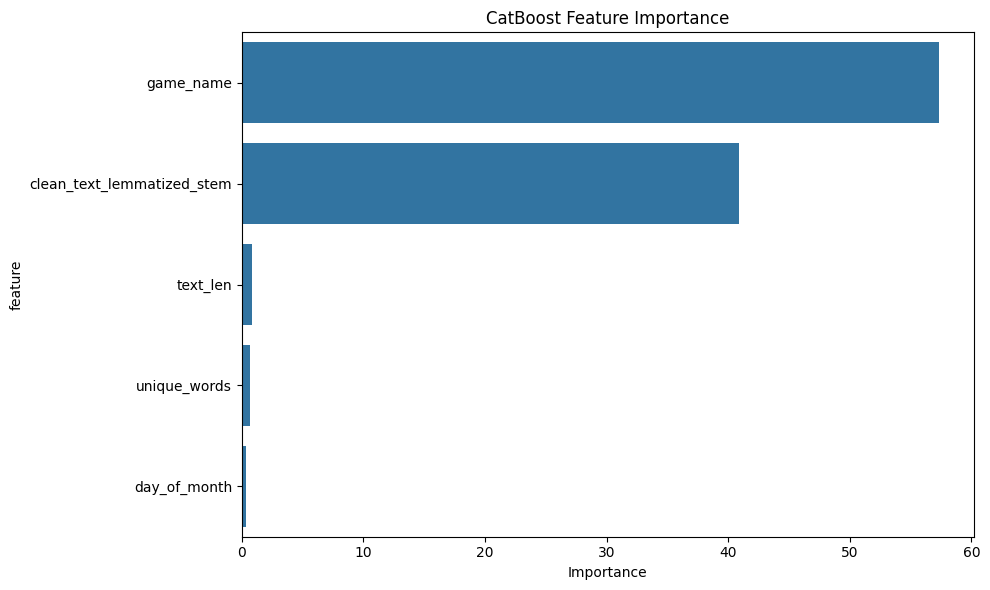

                      feature  importance
4                   game_name     57.3183
3  clean_text_lemmatized_stem     40.8770
0                    text_len      0.8196
1                unique_words      0.6366
2                day_of_month      0.3486


In [289]:
# Важность признаков CatBoost
feature_importance = cb.get_feature_importance()
feature_names = X_train_cb.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print(importance_df.round(4))


In [169]:
save_clean_df.to_csv("final_cleaned_data.csv", index=False)

In [ ]:
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.1 MB/s  0:00:00 eta 0:00:01


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=100, n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_score = xgb_model.score(X_test, y_test)
y_pred = xgb_model.predict(X_test)

print(f"R^2: {xgb_score:.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")


R2: 0.8981
MAE: 20391.2277


In [269]:
print(final_df["avg_players"].describe())

count    7.426000e+03
mean     6.713536e+04
std      1.442348e+05
min      6.000000e-02
25%      8.277970e+03
50%      2.188881e+04
75%      6.025850e+04
max      1.039663e+06
Name: avg_players, dtype: float64


In [ ]:
y_log = np.log1p(final_df["avg_players"])  # log(1+y)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=100)

xgb_model.fit(X_train_log, y_train_log)
y_pred_log = xgb_model.predict(X_test_log)

print(f"R^2 log: {r2_score(y_test_log, y_pred_log):.4f}")
print(f"MSE log: {mean_squared_error(y_test_log, y_pred_log):.4f}")

R² log: 0.9166
MSE log: 0.4051


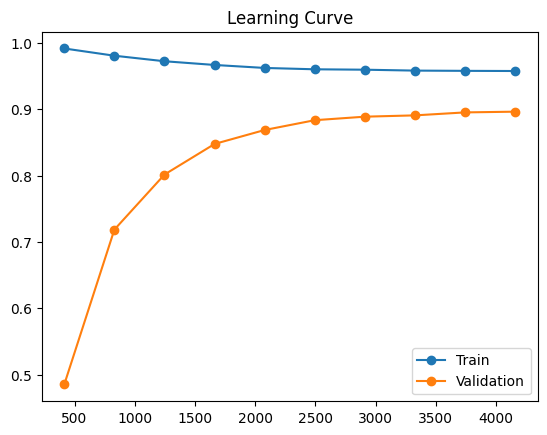

In [ ]:
#Learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X_train_log, y_train_log, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
plt.legend()
plt.show()
